In [1]:
import pandas as pd
import numpy as np
import sys
import scipy
import datetime
import pytz
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import plotly.plotly as py
%matplotlib inline

In [2]:
all_trades = pd.read_csv('WCH18.csv',parse_dates=True,index_col='Date and Time')

In [3]:
def convert_time(time):
    time_format = ('%m/%d/%Y %H:%M:%S.%f') 
    return datetime.strptime(time.strip(), time_format)

In [4]:
all_trades.head()

Symbol   Price  Volume
Date and Time                                 
2017-11-19 19:00:00.141  WCH18  443.00      76
2017-11-19 19:00:00.250  WCH18  443.25      12
2017-11-19 19:00:00.250  WCH18  443.25       1
2017-11-19 19:00:00.250  WCH18  443.50       2
2017-11-19 19:00:00.255  WCH18  443.50       1

In [5]:
all_trades_price = all_trades['Price'].resample('1T').ohlc().shift(1).between_time('08:30', '13:20')

In [6]:
pd.set_option('display.max_rows', 2500)

In [7]:
all_trades['dP1'] = all_trades['Price'] - all_trades['Price'].shift(1)

In [8]:
all_trades_dP1 = all_trades['dP1'].resample('1T').sum().shift(1).between_time('08:30', '13:20')

In [9]:
all_trades_dP1.to_frame



<bound method Series.to_frame of Date and Time
2017-11-20 08:30:00     NaN
2017-11-20 08:31:00   -1.25
2017-11-20 08:32:00   -0.50
2017-11-20 08:33:00   -0.50
2017-11-20 08:34:00    0.50
2017-11-20 08:35:00    0.25
2017-11-20 08:36:00   -0.50
2017-11-20 08:37:00    0.00
2017-11-20 08:38:00    0.00
2017-11-20 08:39:00    0.50
2017-11-20 08:40:00    0.25
2017-11-20 08:41:00   -0.25
2017-11-20 08:42:00    0.00
2017-11-20 08:43:00    0.00
2017-11-20 08:44:00   -0.25
2017-11-20 08:45:00    0.25
2017-11-20 08:46:00    0.50
2017-11-20 08:47:00    0.25
2017-11-20 08:48:00    0.00
2017-11-20 08:49:00   -0.25
2017-11-20 08:50:00   -0.25
2017-11-20 08:51:00    0.00
2017-11-20 08:52:00   -0.25
2017-11-20 08:53:00    0.00
2017-11-20 08:54:00    0.00
2017-11-20 08:55:00    0.00
2017-11-20 08:56:00    0.00
2017-11-20 08:57:00   -0.75
2017-11-20 08:58:00    0.25
2017-11-20 08:59:00    0.00
2017-11-20 09:00:00    0.00
2017-11-20 09:01:00    0.00
2017-11-20 09:02:00    0.00
2017-11-20 09:03:00   -1.00
2

In [10]:
all_trades_price['dP1']=all_trades_dP1

In [11]:
all_trades_volume = all_trades['Volume'].resample('1T').sum().shift(1).between_time('08:30', '13:20')

In [12]:
all_trades_price

open    high     low   close   dP1
Date and Time                                            
2017-11-20 08:30:00     NaN     NaN     NaN     NaN   NaN
2017-11-20 08:31:00  440.00  440.00  438.75  438.75 -1.25
2017-11-20 08:32:00  438.75  439.00  438.25  438.25 -0.50
2017-11-20 08:33:00  438.50  438.50  437.75  437.75 -0.50
2017-11-20 08:34:00  438.00  438.25  437.75  438.25  0.50
2017-11-20 08:35:00  438.00  438.75  438.00  438.50  0.25
2017-11-20 08:36:00  438.25  438.50  438.00  438.00 -0.50
2017-11-20 08:37:00  438.00  438.25  437.75  438.00  0.00
2017-11-20 08:38:00  438.00  438.25  438.00  438.00  0.00
2017-11-20 08:39:00  438.25  438.75  438.00  438.50  0.50
2017-11-20 08:40:00  438.50  438.75  438.50  438.75  0.25
2017-11-20 08:41:00  438.75  438.75  438.50  438.50 -0.25
2017-11-20 08:42:00  438.50  438.75  438.50  438.50  0.00
2017-11-20 08:43:00  438.50  438.75  438.50  438.50  0.00
2017-11-20 08:44:00  438.25  438.25  438.00  438.25 -0.25
2017-11-20 08:45:00  438.25  438.50  438.25  438.50  0.25
2017-11-20 08:46:00  438.75  439.00  438.75  439.00  0.50
2017-11-20 08:47:00  439.00  439.25  439.00  439.25  0.25
2017-11-20 08:48:00  439.25  439.50  439.25  439.25  0.00
2017-11-20 08:49:00  439.25  439.50  439.00  439.00 -0.25
2017-11-20 08:50:00  439.00  439.00  438.75  438.75 -0.25
2017-11-20 08:51:00  438.75  439.00  438.50  438.75  0.00
2017-11-20 08:52:00  438.50  438.75  438.50  438.50 -0.25
2017-11-20 08:53:00  438.50  438.50  438.50  438.50  0.00
2017-11-20 08:54:00  438.50  438.75  438.50  438.50  0.00
2017-11-20 08:55:00  438.50  438.75  438.25  438.50  0.00
2017-11-20 08:56:00  438.50  438.50  438.50  438.50  0.00
2017-11-20 08:57:00  438.25  438.25  437.75  437.75 -0.75
2017-11-20 08:58:00  437.75  438.00  437.75  438.00  0.25
2017-11-20 08:59:00  437.75  438.00  437.75  438.00  0.00
2017-11-20 09:00:00  437.75  438.25  437.75  438.00  0.00
2017-11-20 09:01:00  438.00  438.00  438.00  438.00  0.00
2017-11-20 09:02:00  437.75  438.00  437.75  438.00  0.00
2017-11-20 09:03:00  437.75  438.00  437.00  437.00 -1.00
2017-11-20 09:04:00  437.00  437.00  436.75  437.00  0.00
2017-11-20 09:05:00  437.00  437.00  436.75  437.00  0.00
2017-11-20 09:06:00  437.00  437.25  437.00  437.25  0.25
2017-11-20 09:07:00  437.25  437.25  436.75  437.00 -0.25
2017-11-20 09:08:00  436.75  437.00  436.75  437.00  0.00
2017-11-20 09:09:00  437.00  437.25  437.00  437.25  0.25
2017-11-20 09:10:00  437.50  437.50  437.25  437.25  0.00
2017-11-20 09:11:00  437.25  437.50  437.25  437.50  0.25
2017-11-20 09:12:00  437.50  437.50  437.25  437.25 -0.25
2017-11-20 09:13:00  437.50  437.50  437.25  437.25  0.00
2017-11-20 09:14:00  437.50  437.50  437.25  437.25  0.00
2017-11-20 09:15:00  437.50  437.50  437.25  437.25  0.00
2017-11-20 09:16:00  437.50  437.50  437.25  437.25  0.00
2017-11-20 09:17:00  437.00  437.25  436.75  436.75 -0.50
2017-11-20 09:18:00  436.50  436.75  436.00  436.25 -0.50
2017-11-20 09:19:00  436.25  436.50  436.25  436.50  0.25
2017-11-20 09:20:00  436.50  436.50  436.25  436.25 -0.25
2017-11-20 09:21:00  436.25  436.50  436.25  436.25  0.00
2017-11-20 09:22:00  436.25  437.25  436.25  437.00  0.75
2017-11-20 09:23:00  437.00  437.00  436.75  436.75 -0.25
2017-11-20 09:24:00  436.50  436.75  436.50  436.50 -0.25
2017-11-20 09:25:00  436.75  437.00  436.75  437.00  0.50
2017-11-20 09:26:00  437.00  437.25  436.75  437.25  0.25
2017-11-20 09:27:00  437.50  438.25  437.50  438.00  0.75
2017-11-20 09:28:00  438.25  438.25  438.25  438.25  0.25
2017-11-20 09:29:00  438.50  438.50  438.00  438.50  0.25
2017-11-20 09:30:00  438.25  438.25  438.00  438.25 -0.25
2017-11-20 09:31:00  438.25  438.25  438.00  438.25  0.00
2017-11-20 09:32:00  438.00  438.25  438.00  438.25  0.00
2017-11-20 09:33:00  438.25  438.50  438.00  438.00 -0.25
2017-11-20 09:34:00  438.00  438.25  438.00  438.00  0.00
2017-11-20 09:35:00  438.00  438.00  438.00  438.00  0.00
2017-11-20 09:36:00  438.25  438.50  438.25  438.25  0.25
2017-11-20 09:37:00  

In [13]:
all_trades_price['Volume'] = all_trades_volume

In [14]:
all_trades_price

open    high     low   close   dP1  Volume
Date and Time                                                    
2017-11-20 08:30:00     NaN     NaN     NaN     NaN   NaN     NaN
2017-11-20 08:31:00  440.00  440.00  438.75  438.75 -1.25   440.0
2017-11-20 08:32:00  438.75  439.00  438.25  438.25 -0.50   353.0
2017-11-20 08:33:00  438.50  438.50  437.75  437.75 -0.50   719.0
2017-11-20 08:34:00  438.00  438.25  437.75  438.25  0.50   100.0
2017-11-20 08:35:00  438.00  438.75  438.00  438.50  0.25   240.0
2017-11-20 08:36:00  438.25  438.50  438.00  438.00 -0.50   176.0
2017-11-20 08:37:00  438.00  438.25  437.75  438.00  0.00   113.0
2017-11-20 08:38:00  438.00  438.25  438.00  438.00  0.00    16.0
2017-11-20 08:39:00  438.25  438.75  438.00  438.50  0.50   214.0
2017-11-20 08:40:00  438.50  438.75  438.50  438.75  0.25   206.0
2017-11-20 08:41:00  438.75  438.75  438.50  438.50 -0.25    38.0
2017-11-20 08:42:00  438.50  438.75  438.50  438.50  0.00    17.0
2017-11-20 08:43:00  438.50  438.75  438.50  438.50  0.00   153.0
2017-11-20 08:44:00  438.25  438.25  438.00  438.25 -0.25   136.0
2017-11-20 08:45:00  438.25  438.50  438.25  438.50  0.25   107.0
2017-11-20 08:46:00  438.75  439.00  438.75  439.00  0.50    66.0
2017-11-20 08:47:00  439.00  439.25  439.00  439.25  0.25   130.0
2017-11-20 08:48:00  439.25  439.50  439.25  439.25  0.00    60.0
2017-11-20 08:49:00  439.25  439.50  439.00  439.00 -0.25    53.0
2017-11-20 08:50:00  439.00  439.00  438.75  438.75 -0.25   111.0
2017-11-20 08:51:00  438.75  439.00  438.50  438.75  0.00    85.0
2017-11-20 08:52:00  438.50  438.75  438.50  438.50 -0.25    22.0
2017-11-20 08:53:00  438.50  438.50  438.50  438.50  0.00    82.0
2017-11-20 08:54:00  438.50  438.75  438.50  438.50  0.00    37.0
2017-11-20 08:55:00  438.50  438.75  438.25  438.50  0.00    50.0
2017-11-20 08:56:00  438.50  438.50  438.50  438.50  0.00    47.0
2017-11-20 08:57:00  438.25  438.25  437.75  437.75 -0.75   147.0
2017-11-20 08:58:00  437.75  438.00  437.75  438.00  0.25    62.0
2017-11-20 08:59:00  437.75  438.00  437.75  438.00  0.00    52.0
2017-11-20 09:00:00  437.75  438.25  437.75  438.00  0.00    44.0
2017-11-20 09:01:00  438.00  438.00  438.00  438.00  0.00    61.0
2017-11-20 09:02:00  437.75  438.00  437.75  438.00  0.00    52.0
2017-11-20 09:03:00  437.75  438.00  437.00  437.00 -1.00   497.0
2017-11-20 09:04:00  437.00  437.00  436.75  437.00  0.00   117.0
2017-11-20 09:05:00  437.00  437.00  436.75  437.00  0.00    87.0
2017-11-20 09:06:00  437.00  437.25  437.00  437.25  0.25    63.0
2017-11-20 09:07:00  437.25  437.25  436.75  437.00 -0.25    81.0
2017-11-20 09:08:00  436.75  437.00  436.75  437.00  0.00   121.0
2017-11-20 09:09:00  437.00  437.25  437.00  437.25  0.25   104.0
2017-11-20 09:10:00  437.50  437.50  437.25  437.25  0.00   122.0
2017-11-20 09:11:00  437.25  437.50  437.25  437.50  0.25    44.0
2017-11-20 09:12:00  437.50  437.50  437.25  437.25 -0.25    22.0
2017-11-20 09:13:00  437.50  437.50  437.25  437.25  0.00    20.0
2017-11-20 09:14:00  437.50  437.50  437.25  437.25  0.00     8.0
2017-11-20 09:15:00  437.50  437.50  437.25  437.25  0.00    16.0
2017-11-20 09:16:00  437.50  437.50  437.25  437.25  0.00    59.0
2017-11-20 09:17:00  437.00  437.25  436.75  436.75 -0.50   227.0
2017-11-20 09:18:00  436.50  436.75  436.00  436.25 -0.50   766.0
2017-11-20 09:19:00  436.25  436.50  436.25  436.50  0.25   264.0
2017-11-20 09:20:00  436.50  436.50  436.25  436.25 -0.25    44.0
2017-11-20 09:21:00  436.25  436.50  436.25  436.25  0.00    11.0
2017-11-20 09:22:00  436.25  437.25  436.25  437.00  0.75   365.0
2017-11-20 09:23:00  437.00  437.00  436.75  436.75 -0.25   135.0
2017-11-20 09:24:00  436.50  436.75  436.50  436.50 -0.25    26.0
2017-11-20 09:25:00  436.75  437.00  436.75  437.00  0.50    64.0
2017-11-20 09:26:00  437.00  437.25  436.75  437.25  0.25   134.0
2017-11-20 09:27:00  437.50  438.25  437.50  438.00  0.75   282.0
2017-11-20 09:28:00  438.25  438.25  438.25  438.25  0.25    72

In [15]:
#Vbar= 20 day average volume /bucket.size ('the number of volume buckets per day')"
Vbar= 55000/38

In [16]:
#Calculate the fractional volume of Vbar traded each second."
all_trades_price['Vfrac']=all_trades_price['Volume']/Vbar

In [17]:
#Cfrac is a cumulative sum of Vfrac"
all_trades_price['Cfrac']= all_trades_price['Vfrac'].cumsum()

In [18]:
all_trades_price['Next'] = (all_trades_price['Cfrac'] - (all_trades_price['Cfrac'].apply(np.floor)))/all_trades_price['Vfrac']

In [19]:
all_trades_price['Next'].replace(np.inf, 0)['Next'] = all_trades_price

In [20]:
all_trades_price['Previous']= (all_trades_price['dP1'].shift(1)) * (all_trades_price['Next'].shift(1))

In [21]:
all_trades_price['dp2']= (1 - all_trades_price['Next'])* all_trades_price['dP1'] + all_trades_price['Previous']

In [22]:
all_trades_price['Vtick']=all_trades_price['Cfrac'].apply(np.floor)

In [23]:
all_trades_price['Vtick']=all_trades_price['Vtick']- all_trades_price['Vtick'].diff()

In [24]:
all_trades_price.reset_index()

Date and Time    open    high     low   close   dP1  Volume  \
0    2017-11-20 08:30:00     NaN     NaN     NaN     NaN   NaN     NaN   
1    2017-11-20 08:31:00  440.00  440.00  438.75  438.75 -1.25   440.0   
2    2017-11-20 08:32:00  438.75  439.00  438.25  438.25 -0.50   353.0   
3    2017-11-20 08:33:00  438.50  438.50  437.75  437.75 -0.50   719.0   
4    2017-11-20 08:34:00  438.00  438.25  437.75  438.25  0.50   100.0   
5    2017-11-20 08:35:00  438.00  438.75  438.00  438.50  0.25   240.0   
6    2017-11-20 08:36:00  438.25  438.50  438.00  438.00 -0.50   176.0   
7    2017-11-20 08:37:00  438.00  438.25  437.75  438.00  0.00   113.0   
8    2017-11-20 08:38:00  438.00  438.25  438.00  438.00  0.00    16.0   
9    2017-11-20 08:39:00  438.25  438.75  438.00  438.50  0.50   214.0   
10   2017-11-20 08:40:00  438.50  438.75  438.50  438.75  0.25   206.0   
11   2017-11-20 08:41:00  438.75  438.75  438.50  438.50 -0.25    38.0   
12   2017-11-20 08:42:00  438.50  438.75  438.50  438.50  0.00    17.0   
13   2017-11-20 08:43:00  438.50  438.75  438.50  438.50  0.00   153.0   
14   2017-11-20 08:44:00  438.25  438.25  438.00  438.25 -0.25   136.0   
15   2017-11-20 08:45:00  438.25  438.50  438.25  438.50  0.25   107.0   
16   2017-11-20 08:46:00  438.75  439.00  438.75  439.00  0.50    66.0   
17   2017-11-20 08:47:00  439.00  439.25  439.00  439.25  0.25   130.0   
18   2017-11-20 08:48:00  439.25  439.50  439.25  439.25  0.00    60.0   
19   2017-11-20 08:49:00  439.25  439.50  439.00  439.00 -0.25    53.0   
20   2017-11-20 08:50:00  439.00  439.00  438.75  438.75 -0.25   111.0   
21   2017-11-20 08:51:00  438.75  439.00  438.50  438.75  0.00    85.0   
22   2017-11-20 08:52:00  438.50  438.75  438.50  438.50 -0.25    22.0   
23   2017-11-20 08:53:00  438.50  438.50  438.50  438.50  0.00    82.0   
24   2017-11-20 08:54:00  438.50  438.75  438.50  438.50  0.00    37.0   
25   2017-11-20 08:55:00  438.50  438.75  438.25  438.50  0.00    50.0   
26   2017-11-20 08:56:00  438.50  438.50  438.50  438.50  0.00    47.0   
27   2017-11-20 08:57:00  438.25  438.25  437.75  437.75 -0.75   147.0   
28   2017-11-20 08:58:00  437.75  438.00  437.75  438.00  0.25    62.0   
29   2017-11-20 08:59:00  437.75  438.00  437.75  438.00  0.00    52.0   
30   2017-11-20 09:00:00  437.75  438.25  437.75  438.00  0.00    44.0   
31   2017-11-20 09:01:00  438.00  438.00  438.00  438.00  0.00    61.0   
32   2017-11-20 09:02:00  437.75  438.00  437.75  438.00  0.00    52.0   
33   2017-11-20 09:03:00  437.75  438.00  437.00  437.00 -1.00   497.0   
34   2017-11-20 09:04:00  437.00  437.00  436.75  437.00  0.00   117.0   
35   2017-11-20 09:05:00  437.00  437.00  436.75  437.00  0.00    87.0   
36   2017-11-20 09:06:00  437.00  437.25  437.00  437.25  0.25    63.0   
37   2017-11-20 09:07:00  437.25  437.25  436.75  437.00 -0.25    81.0   
38   2017-11-20 09:08:00  436.75  437.00  436.75  437.00  0.00   121.0   
39   2017-11-20 09:09:00  437.00  437.25  437.00  437.25  0.25   104.0   
40   2017-11-20 09:10:00  437.50  437.50  437.25  437.25  0.00   122.0   
41   2017-11-20 09:11:00  437.25  437.50  437.25  437.50  0.25    44.0   
42   2017-11-20 09:12:00  437.50  437.50  437.25  437.25 -0.25    22.0   
43   2017-11-20 09:13:00  437.50  437.50  437.25  437.25  0.00    20.0   
44   2017-11-20 09:14:00  437.50  437.50  437.25  437.25  0.00     8.0   
45   2017-11-20 09:15:00  437.50  437.50  437.25  437.25  0.00    16.0   
46   2017-11-20 09:16:00  437.50  437.50  437.25  437.25  0.00    59.0   
47   2017-11-20 09:17:00  437.00  437.25  436.75  436.75 -0.50   227.0   
48   2017-11-20 09:18:00  436.50  436.75  436.00  436.25 -0.50   766.0   
49   2017-11-20 09:19:00  436.25  436.50  436.25  436.50  0.25   264.0   
50   2017-11-20 09:20:00  436.50  436.50  436.25  436.25 -0.25    44.0   
51   2017-11-20 09:21:00  436.25  436.50  436.25  436.25  0.00    11.0   
52   2017-11-20 09:22:00  436.25  437.25  436.25  437.00  0.75   365.0   
53   2017-11-20

In [25]:
test_sum = pd.DataFrame()

In [26]:
test_sum = all_trades_price.groupby(['Date and Time', 'Vtick']).last()

In [27]:
test_sum

open    high     low   close   dP1  Volume  \
Date and Time       Vtick                                                 
2017-11-20 08:32:00 0.0    438.75  439.00  438.25  438.25 -0.50   353.0   
2017-11-20 08:33:00 0.0    438.50  438.50  437.75  437.75 -0.50   719.0   
2017-11-20 08:34:00 1.0    438.00  438.25  437.75  438.25  0.50   100.0   
2017-11-20 08:35:00 1.0    438.00  438.75  438.00  438.50  0.25   240.0   
2017-11-20 08:36:00 1.0    438.25  438.50  438.00  438.00 -0.50   176.0   
2017-11-20 08:37:00 1.0    438.00  438.25  437.75  438.00  0.00   113.0   
2017-11-20 08:38:00 1.0    438.00  438.25  438.00  438.00  0.00    16.0   
2017-11-20 08:39:00 1.0    438.25  438.75  438.00  438.50  0.50   214.0   
2017-11-20 08:40:00 1.0    438.50  438.75  438.50  438.75  0.25   206.0   
2017-11-20 08:41:00 1.0    438.75  438.75  438.50  438.50 -0.25    38.0   
2017-11-20 08:42:00 1.0    438.50  438.75  438.50  438.50  0.00    17.0   
2017-11-20 08:43:00 1.0    438.50  438.75  438.50  438.50  0.00   153.0   
2017-11-20 08:44:00 1.0    438.25  438.25  438.00  438.25 -0.25   136.0   
2017-11-20 08:45:00 2.0    438.25  438.50  438.25  438.50  0.25   107.0   
2017-11-20 08:46:00 2.0    438.75  439.00  438.75  439.00  0.50    66.0   
2017-11-20 08:47:00 2.0    439.00  439.25  439.00  439.25  0.25   130.0   
2017-11-20 08:48:00 2.0    439.25  439.50  439.25  439.25  0.00    60.0   
2017-11-20 08:49:00 2.0    439.25  439.50  439.00  439.00 -0.25    53.0   
2017-11-20 08:50:00 2.0    439.00  439.00  438.75  438.75 -0.25   111.0   
2017-11-20 08:51:00 2.0    438.75  439.00  438.50  438.75  0.00    85.0   
2017-11-20 08:52:00 2.0    438.50  438.75  438.50  438.50 -0.25    22.0   
2017-11-20 08:53:00 2.0    438.50  438.50  438.50  438.50  0.00    82.0   
2017-11-20 08:54:00 2.0    438.50  438.75  438.50  438.50  0.00    37.0   
2017-11-20 08:55:00 2.0    438.50  438.75  438.25  438.50  0.00    50.0   
2017-11-20 08:56:00 2.0    438.50  438.50  438.50  438.50  0.00    47.0   
2017-11-20 08:57:00 2.0    438.25  438.25  437.75  437.75 -0.75   147.0   
2017-11-20 08:58:00 2.0    437.75  438.00  437.75  438.00  0.25    62.0   
2017-11-20 08:59:00 2.0    437.75  438.00  437.75  438.00  0.00    52.0   
2017-11-20 09:00:00 2.0    437.75  438.25  437.75  438.00  0.00    44.0   
2017-11-20 09:01:00 2.0    438.00  438.00  438.00  438.00  0.00    61.0   
2017-11-20 09:02:00 2.0    437.75  438.00  437.75  438.00  0.00    52.0   
2017-11-20 09:03:00 2.0    437.75  438.00  437.00  437.00 -1.00   497.0   
2017-11-20 09:04:00 3.0    437.00  437.00  436.75  437.00  0.00   117.0   
2017-11-20 09:05:00 3.0    437.00  437.00  436.75  437.00  0.00    87.0   
2017-11-20 09:06:00 3.0    437.00  437.25  437.00  437.25  0.25    63.0   
2017-11-20 09:07:00 3.0    437.25  437.25  436.75  437.00 -0.25    81.0   
2017-11-20 09:08:00 3.0    436.75  437.00  436.75  437.00  0.00   121.0   
2017-11-20 09:09:00 3.0    437.00  437.25  437.00  437.25  0.25   104.0   
2017-11-20 09:10:00 3.0    437.50  437.50  437.25  437.25  0.00   122.0   
2017-11-20 09:11:00 3.0    437.25  437.50  437.25  437.50  0.25    44.0   
2017-11-20 09:12:00 3.0    437.50  437.50  437.25  437.25 -0.25    22.0   
2017-11-20 09:13:00 3.0    437.50  437.50  437.25  437.25  0.00    20.0   
2017-11-20 09:14:00 3.0    437.50  437.50  437.25  437.25  0.00     8.0   
2017-11-20 09:15:00 3.0    437.50  437.50  437.25  437.25  0.00    16.0   
2017-11-20 09:16:00 3.0    437.50  437.50  437.25  437.25  0.00    59.0   
2017-11-20 09:17:00 3.0    437.00  437.25  436.75  436.75 -0.50   227.0   
2017-11-20 09:18:00 3.0    436.50  436.75  436.00  436.25 -0.50   766.0   
2017-11-20 09:19:00 4.0    436.25  436.50  436.25  436.50  0.25   264.0   
2017-11-20 09:20:00 4.0    436.50  436.50  436.25  436.25 -0.25    44.0   
2017-11-20 09:21:00 4.0    436.25  436.50  436.25  436.25  0.00    11.0   
2017-11-20 09:22:00 4.0    436.25  437.25  436.25  437.00  0.75   365.0   
2017-11-20 09:23:00 4.0    437.00  437.00  436.75  436

In [28]:
#Calculate the Volume Weighted Average Price for each Vtick
V_Wap = pd.DataFrame()

In [29]:
V_Wap['Volume'] = test_sum.Volume.groupby('Vtick').cumsum()


In [30]:
V_Wap['high'] = test_sum.groupby(['Vtick'], sort=False)['high'].transform(max)

In [31]:
V_Wap['low'] = test_sum.groupby(['Vtick'], sort=False)['low'].transform(min)

In [32]:
V_Wap['close'] =  test_sum.groupby(['Vtick'], as_index=False)['close'].nth(-1)

In [33]:
V_Wap['dP1'] = test_sum.dP1.groupby('Vtick').cumsum()


In [34]:
V_Wap

Volume    high     low   close   dP1
Date and Time       Vtick                                      
2017-11-20 08:32:00 0.0     353.0  439.00  437.75     NaN -0.50
2017-11-20 08:33:00 0.0    1072.0  439.00  437.75  437.75 -1.00
2017-11-20 08:34:00 1.0     100.0  438.75  437.75     NaN  0.50
2017-11-20 08:35:00 1.0     340.0  438.75  437.75     NaN  0.75
2017-11-20 08:36:00 1.0     516.0  438.75  437.75     NaN  0.25
2017-11-20 08:37:00 1.0     629.0  438.75  437.75     NaN  0.25
2017-11-20 08:38:00 1.0     645.0  438.75  437.75     NaN  0.25
2017-11-20 08:39:00 1.0     859.0  438.75  437.75     NaN  0.75
2017-11-20 08:40:00 1.0    1065.0  438.75  437.75     NaN  1.00
2017-11-20 08:41:00 1.0    1103.0  438.75  437.75     NaN  0.75
2017-11-20 08:42:00 1.0    1120.0  438.75  437.75     NaN  0.75
2017-11-20 08:43:00 1.0    1273.0  438.75  437.75     NaN  0.75
2017-11-20 08:44:00 1.0    1409.0  438.75  437.75  438.25  0.50
2017-11-20 08:45:00 2.0     107.0  439.50  437.00     NaN  0.25
2017-11-20 08:46:00 2.0     173.0  439.50  437.00     NaN  0.75
2017-11-20 08:47:00 2.0     303.0  439.50  437.00     NaN  1.00
2017-11-20 08:48:00 2.0     363.0  439.50  437.00     NaN  1.00
2017-11-20 08:49:00 2.0     416.0  439.50  437.00     NaN  0.75
2017-11-20 08:50:00 2.0     527.0  439.50  437.00     NaN  0.50
2017-11-20 08:51:00 2.0     612.0  439.50  437.00     NaN  0.50
2017-11-20 08:52:00 2.0     634.0  439.50  437.00     NaN  0.25
2017-11-20 08:53:00 2.0     716.0  439.50  437.00     NaN  0.25
2017-11-20 08:54:00 2.0     753.0  439.50  437.00     NaN  0.25
2017-11-20 08:55:00 2.0     803.0  439.50  437.00     NaN  0.25
2017-11-20 08:56:00 2.0     850.0  439.50  437.00     NaN  0.25
2017-11-20 08:57:00 2.0     997.0  439.50  437.00     NaN -0.50
2017-11-20 08:58:00 2.0    1059.0  439.50  437.00     NaN -0.25
2017-11-20 08:59:00 2.0    1111.0  439.50  437.00     NaN -0.25
2017-11-20 09:00:00 2.0    1155.0  439.50  437.00     NaN -0.25
2017-11-20 09:01:00 2.0    1216.0  439.50  437.00     NaN -0.25
2017-11-20 09:02:00 2.0    1268.0  439.50  437.00     NaN -0.25
2017-11-20 09:03:00 2.0    1765.0  439.50  437.00  437.00 -1.25
2017-11-20 09:04:00 3.0     117.0  437.50  436.00     NaN  0.00
2017-11-20 09:05:00 3.0     204.0  437.50  436.00     NaN  0.00
2017-11-20 09:06:00 3.0     267.0  437.50  436.00     NaN  0.25
2017-11-20 09:07:00 3.0     348.0  437.50  436.00     NaN  0.00
2017-11-20 09:08:00 3.0     469.0  437.50  436.00     NaN  0.00
2017-11-20 09:09:00 3.0     573.0  437.50  436.00     NaN  0.25
2017-11-20 09:10:00 3.0     695.0  437.50  436.00     NaN  0.25
2017-11-20 09:11:00 3.0     739.0  437.50  436.00     NaN  0.50
2017-11-20 09:12:00 3.0     761.0  437.50  436.00     NaN  0.25
2017-11-20 09:13:00 3.0     781.0  437.50  436.00     NaN  0.25
2017-11-20 09:14:00 3.0     789.0  437.50  436.00     NaN  0.25
2017-11-20 09:15:00 3.0     805.0  437.50  436.00     NaN  0.25
2017-11-20 09:16:00 3.0     864.0  437.50  436.00     NaN  0.25
2017-11-20 09:17:00 3.0    1091.0  437.50  436.00     NaN -0.25
2017-11-20 09:18:00 3.0    1857.0  437.50  436.00  436.25 -0.75
2017-11-20 09:19:00 4.0     264.0  437.25  436.25     NaN  0.25
2017-11-20 09:20:00 4.0     308.0  437.25  436.25     NaN  0.00
2017-11-20 09:21:00 4.0     319.0  437.25  436.25     NaN  0.00
2017-11-20 09:22:00 4.0     684.0  437.25  436.25     NaN  0.75
2017-11-20 09:23:00 4.0     819.0  437.25  436.25  436.75  0.50
2017-11-20 09:24:00 5.0      26.0  438.50  436.50     NaN -0.25
2017-11-20 09:25:00 5.0      90.0  438.50  436.50     NaN  0.25
2017-11-20 09:26:00 5.0     224.0  438.50  436.50     NaN  0.50
2017-11-20 09:27:00 5.0     506.0  438.50  436.50     NaN  1.25
2017-11-20 09:28:00 5.0     578.0  438.50  436.50     NaN  1.50
2017-11-20 09:29:00 5.0     632.0  438.50  436.50     NaN  1.75
2017-11-20 09:30:00 5.0     717.0  438.50  436.50     NaN  1.50
2017-11-20 09:31:00 5.0     746.0  438.50  436.50     NaN  1.50
2017-11-20 09:32:00 5.0     771.0  438.50  436.50     NaN  

In [35]:
V_Wap = V_Wap.groupby('Vtick', as_index = False).nth(-1)

In [36]:
V_Wap


Volume    high     low   close   dP1
Date and Time       Vtick                                      
2017-11-20 08:33:00 0.0    1072.0  439.00  437.75  437.75 -1.00
2017-11-20 08:44:00 1.0    1409.0  438.75  437.75  438.25  0.50
2017-11-20 09:03:00 2.0    1765.0  439.50  437.00  437.00 -1.25
2017-11-20 09:18:00 3.0    1857.0  437.50  436.00  436.25 -0.75
2017-11-20 09:23:00 4.0     819.0  437.25  436.25  436.75  0.50
2017-11-20 09:44:00 5.0    1351.0  438.50  436.50  438.00  1.25
2017-11-20 10:15:00 6.0    1476.0  439.75  437.50  439.50  1.50
2017-11-20 10:43:00 7.0    1317.0  439.75  437.25  438.25 -1.50
2017-11-20 11:31:00 8.0    1458.0  438.75  437.25  437.50 -0.75
2017-11-20 12:20:00 9.0    1456.0  439.50  437.25  439.50  2.00
2017-11-20 12:52:00 10.0   1369.0  439.75  438.50  439.00 -0.25
2017-11-20 13:15:00 11.0   2203.0  438.75  437.75  438.50 -0.50
2017-11-20 13:20:00 12.0    419.0  439.00  438.25  438.25 -0.25
2017-11-21 08:47:00 13.0   1346.0  439.00  436.50  439.00  2.25
2017-11-21 08:53:00 14.0   1268.0  441.00  439.00  440.50  1.50
2017-11-21 09:16:00 15.0   1466.0  441.00  439.50  439.75 -0.75
2017-11-21 09:31:00 16.0   1500.0  442.00  439.50  442.00  2.25
2017-11-21 09:36:00 17.0   1493.0  442.50  441.75  442.00  0.00
2017-11-21 09:44:00 18.0   1321.0  443.00  441.75  442.75  0.75
2017-11-21 09:46:00 19.0   3021.0  445.00  442.50  444.50  1.75
2017-11-21 09:56:00 21.0   1405.0  444.75  443.75  443.75 -0.75
2017-11-21 10:07:00 22.0   1357.0  444.00  443.00  443.50 -0.25
2017-11-21 10:22:00 23.0   1445.0  443.75  443.25  443.75  0.25
2017-11-21 10:35:00 24.0   1465.0  444.00  443.00  443.50 -0.25
2017-11-21 10:49:00 25.0   1529.0  443.50  441.50  441.75 -1.75
2017-11-21 10:59:00 26.0   1660.0  442.00  439.25  439.50 -2.25
2017-11-21 11:13:00 27.0   1163.0  440.50  439.50  440.50  1.00
2017-11-21 11:49:00 28.0   1400.0  440.50  439.00  440.00 -0.50
2017-11-21 12:27:00 29.0   1504.0  442.00  440.00  442.00  2.25
2017-11-21 12:58:00 30.0   1482.0  442.25  441.25  441.50 -0.50
2017-11-21 13:15:00 31.0   1926.0  442.25  440.50  441.50  0.00
2017-11-22 08:33:00 32.0    683.0  442.25  441.25  442.00  0.25
2017-11-22 08:37:00 33.0   1405.0  442.50  439.50  439.75 -2.25
2017-11-22 08:45:00 34.0   1664.0  440.00  438.50  438.50 -1.25
2017-11-22 08:52:00 35.0   1221.0  439.25  438.50  438.75  0.25
2017-11-22 09:06:00 36.0   1583.0  439.75  438.50  439.50  0.75
2017-11-22 09:22:00 37.0   1479.0  440.00  438.75  439.25 -0.25
2017-11-22 09:40:00 38.0   1343.0  439.75  438.75  439.00 -0.25
2017-11-22 09:52:00 39.0   1560.0  439.75  439.00  439.50  0.50
2017-11-22 10:11:00 40.0   1259.0  441.00  439.25  440.75  1.25
2017-11-22 10:18:00 41.0   1612.0  442.00  440.50  442.00  1.25
2017-11-22 10:21:00 42.0   1314.0  443.25  441.75  443.00  1.00
2017-11-22 10:35:00 43.0   1804.0  443.25  442.00  443.25  0.25
2017-11-22 10:47:00 44.0   1300.0  444.25  443.25  444.00  0.75
2017-11-22 10:57:00 45.0   1308.0  444.50  443.50  443.50 -0.50
2017-11-22 11:14:00 46.0   1342.0  443.75  442.00  442.50 -1.00
2017-11-22 11:36:00 47.0   1507.0  443.00  441.50  442.25 -0.25
2017-11-22 12:23:00 48.0   1378.0  442.50  441.50  442.00  0.25
2017-11-22 13:10:00 49.0   1270.0  443.00  441.25  441.50 -1.25
2017-11-22 13:16:00 50.0   1634.0  441.50  440.25  440.75 -0.75
2017-11-22 13:20:00 51.0    544.0  441.25  440.50  441.00  0.25
2017-11-24 08:36:00 52.0   1343.0  440.25  437.75  440.00  2.00
2017-11-24 08:46:00 53.0   1420.0  440.50  438.50  438.75 -1.25
2017-11-24 08:55:00 54.0   1476.0  438.75  438.00  438.50 -0.25
2017-11-24 09:06:00 55.0   1514.0  438.75  437.25  437.25 -1.25
2017-11-24 09:24:00 56.0   1338.0  438.00  437.00  437.75  0.50
2017-11-24 09:44:00 57.0   1441.0  438.50  437.00  437.00 -0.75
2017-11-24 10:07:00 58.0   1407.0  437.50  437.00  437.00  0.00
2017-11-24 10:11:00 59.0   1870.0  437.25  435.75  435.75 -1.25
2017-11-24 10:16:00 60.0   1250.0  436.50  435.75  436.50  0.75
2017-11-24 10:26:00 61.0   1516.0  436.50  435.00  435.50 -

In [37]:
def VWAP(df):
    V = df.Volume.values
    h = df.high.values
    l = df.low.values
    c = df.low.values
    return df.assign(vwap=((((h+l+c)/3)*V).cumsum())/ V.cumsum())

In [38]:
V_Wap = V_Wap.groupby('Vtick', group_keys=False).apply(VWAP)

In [39]:
V_Wap

Volume    high     low   close   dP1        vwap
Date and Time       Vtick                                                  
2017-11-20 08:33:00 0.0    1072.0  439.00  437.75  437.75 -1.00  438.166667
2017-11-20 08:44:00 1.0    1409.0  438.75  437.75  438.25  0.50  438.083333
2017-11-20 09:03:00 2.0    1765.0  439.50  437.00  437.00 -1.25  437.833333
2017-11-20 09:18:00 3.0    1857.0  437.50  436.00  436.25 -0.75  436.500000
2017-11-20 09:23:00 4.0     819.0  437.25  436.25  436.75  0.50  436.583333
2017-11-20 09:44:00 5.0    1351.0  438.50  436.50  438.00  1.25  437.166667
2017-11-20 10:15:00 6.0    1476.0  439.75  437.50  439.50  1.50  438.250000
2017-11-20 10:43:00 7.0    1317.0  439.75  437.25  438.25 -1.50  438.083333
2017-11-20 11:31:00 8.0    1458.0  438.75  437.25  437.50 -0.75  437.750000
2017-11-20 12:20:00 9.0    1456.0  439.50  437.25  439.50  2.00  438.000000
2017-11-20 12:52:00 10.0   1369.0  439.75  438.50  439.00 -0.25  438.916667
2017-11-20 13:15:00 11.0   2203.0  438.75  437.75  438.50 -0.50  438.083333
2017-11-20 13:20:00 12.0    419.0  439.00  438.25  438.25 -0.25  438.500000
2017-11-21 08:47:00 13.0   1346.0  439.00  436.50  439.00  2.25  437.333333
2017-11-21 08:53:00 14.0   1268.0  441.00  439.00  440.50  1.50  439.666667
2017-11-21 09:16:00 15.0   1466.0  441.00  439.50  439.75 -0.75  440.000000
2017-11-21 09:31:00 16.0   1500.0  442.00  439.50  442.00  2.25  440.333333
2017-11-21 09:36:00 17.0   1493.0  442.50  441.75  442.00  0.00  442.000000
2017-11-21 09:44:00 18.0   1321.0  443.00  441.75  442.75  0.75  442.166667
2017-11-21 09:46:00 19.0   3021.0  445.00  442.50  444.50  1.75  443.333333
2017-11-21 09:56:00 21.0   1405.0  444.75  443.75  443.75 -0.75  444.083333
2017-11-21 10:07:00 22.0   1357.0  444.00  443.00  443.50 -0.25  443.333333
2017-11-21 10:22:00 23.0   1445.0  443.75  443.25  443.75  0.25  443.416667
2017-11-21 10:35:00 24.0   1465.0  444.00  443.00  443.50 -0.25  443.333333
2017-11-21 10:49:00 25.0   1529.0  443.50  441.50  441.75 -1.75  442.166667
2017-11-21 10:59:00 26.0   1660.0  442.00  439.25  439.50 -2.25  440.166667
2017-11-21 11:13:00 27.0   1163.0  440.50  439.50  440.50  1.00  439.833333
2017-11-21 11:49:00 28.0   1400.0  440.50  439.00  440.00 -0.50  439.500000
2017-11-21 12:27:00 29.0   1504.0  442.00  440.00  442.00  2.25  440.666667
2017-11-21 12:58:00 30.0   1482.0  442.25  441.25  441.50 -0.50  441.583333
2017-11-21 13:15:00 31.0   1926.0  442.25  440.50  441.50  0.00  441.083333
2017-11-22 08:33:00 32.0    683.0  442.25  441.25  442.00  0.25  441.583333
2017-11-22 08:37:00 33.0   1405.0  442.50  439.50  439.75 -2.25  440.500000
2017-11-22 08:45:00 34.0   1664.0  440.00  438.50  438.50 -1.25  439.000000
2017-11-22 08:52:00 35.0   1221.0  439.25  438.50  438.75  0.25  438.750000
2017-11-22 09:06:00 36.0   1583.0  439.75  438.50  439.50  0.75  438.916667
2017-11-22 09:22:00 37.0   1479.0  440.00  438.75  439.25 -0.25  439.166667
2017-11-22 09:40:00 38.0   1343.0  439.75  438.75  439.00 -0.25  439.083333
2017-11-22 09:52:00 39.0   1560.0  439.75  439.00  439.50  0.50  439.250000
2017-11-22 10:11:00 40.0   1259.0  441.00  439.25  440.75  1.25  439.833333
2017-11-22 10:18:00 41.0   1612.0  442.00  440.50  442.00  1.25  441.000000
2017-11-22 10:21:00 42.0   1314.0  443.25  441.75  443.00  1.00  442.250000
2017-11-22 10:35:00 43.0   1804.0  443.25  442.00  443.25  0.25  442.416667
2017-11-22 10:47:00 44.0   1300.0  444.25  443.25  444.00  0.75  443.583333
2017-11-22 10:57:00 45.0   1308.0  444.50  443.50  443.50 -0.50  443.833333
2017-11-22 11:14:00 46.0   1342.0  443.75  442.00  442.50 -1.00  442.583333
2017-11-22 11:36:00 47.0   1507.0  443.00  441.50  442.25 -0.25  442.000000
2017-11-22 12:23:00 48.0   1378.0  442.50  441.50  442.00  0.25  441.833333
2017-11-22 13:10:00 49.0   1270.0  443.00  441.25  441.50 -1.25  441.833333
2017-11-22 13:16:00 50.0   1634.0  441.50  440.25  440.75 -0.75  440.666667
2017-11-22 13:20:00 51.0    544.0  441.25  440.50  441.00  0.25  440.750000

In [40]:
V_Wap['f_sma'] = V_Wap['vwap'].rolling(5).mean()

In [41]:
V_Wap['s_sma'] = V_Wap['vwap'].rolling(34).mean()

In [42]:
V_Wap

Volume    high     low   close   dP1        vwap  \
Date and Time       Vtick                                                     
2017-11-20 08:33:00 0.0    1072.0  439.00  437.75  437.75 -1.00  438.166667   
2017-11-20 08:44:00 1.0    1409.0  438.75  437.75  438.25  0.50  438.083333   
2017-11-20 09:03:00 2.0    1765.0  439.50  437.00  437.00 -1.25  437.833333   
2017-11-20 09:18:00 3.0    1857.0  437.50  436.00  436.25 -0.75  436.500000   
2017-11-20 09:23:00 4.0     819.0  437.25  436.25  436.75  0.50  436.583333   
2017-11-20 09:44:00 5.0    1351.0  438.50  436.50  438.00  1.25  437.166667   
2017-11-20 10:15:00 6.0    1476.0  439.75  437.50  439.50  1.50  438.250000   
2017-11-20 10:43:00 7.0    1317.0  439.75  437.25  438.25 -1.50  438.083333   
2017-11-20 11:31:00 8.0    1458.0  438.75  437.25  437.50 -0.75  437.750000   
2017-11-20 12:20:00 9.0    1456.0  439.50  437.25  439.50  2.00  438.000000   
2017-11-20 12:52:00 10.0   1369.0  439.75  438.50  439.00 -0.25  438.916667   
2017-11-20 13:15:00 11.0   2203.0  438.75  437.75  438.50 -0.50  438.083333   
2017-11-20 13:20:00 12.0    419.0  439.00  438.25  438.25 -0.25  438.500000   
2017-11-21 08:47:00 13.0   1346.0  439.00  436.50  439.00  2.25  437.333333   
2017-11-21 08:53:00 14.0   1268.0  441.00  439.00  440.50  1.50  439.666667   
2017-11-21 09:16:00 15.0   1466.0  441.00  439.50  439.75 -0.75  440.000000   
2017-11-21 09:31:00 16.0   1500.0  442.00  439.50  442.00  2.25  440.333333   
2017-11-21 09:36:00 17.0   1493.0  442.50  441.75  442.00  0.00  442.000000   
2017-11-21 09:44:00 18.0   1321.0  443.00  441.75  442.75  0.75  442.166667   
2017-11-21 09:46:00 19.0   3021.0  445.00  442.50  444.50  1.75  443.333333   
2017-11-21 09:56:00 21.0   1405.0  444.75  443.75  443.75 -0.75  444.083333   
2017-11-21 10:07:00 22.0   1357.0  444.00  443.00  443.50 -0.25  443.333333   
2017-11-21 10:22:00 23.0   1445.0  443.75  443.25  443.75  0.25  443.416667   
2017-11-21 10:35:00 24.0   1465.0  444.00  443.00  443.50 -0.25  443.333333   
2017-11-21 10:49:00 25.0   1529.0  443.50  441.50  441.75 -1.75  442.166667   
2017-11-21 10:59:00 26.0   1660.0  442.00  439.25  439.50 -2.25  440.166667   
2017-11-21 11:13:00 27.0   1163.0  440.50  439.50  440.50  1.00  439.833333   
2017-11-21 11:49:00 28.0   1400.0  440.50  439.00  440.00 -0.50  439.500000   
2017-11-21 12:27:00 29.0   1504.0  442.00  440.00  442.00  2.25  440.666667   
2017-11-21 12:58:00 30.0   1482.0  442.25  441.25  441.50 -0.50  441.583333   
2017-11-21 13:15:00 31.0   1926.0  442.25  440.50  441.50  0.00  441.083333   
2017-11-22 08:33:00 32.0    683.0  442.25  441.25  442.00  0.25  441.583333   
2017-11-22 08:37:00 33.0   1405.0  442.50  439.50  439.75 -2.25  440.500000   
2017-11-22 08:45:00 34.0   1664.0  440.00  438.50  438.50 -1.25  439.000000   
2017-11-22 08:52:00 35.0   1221.0  439.25  438.50  438.75  0.25  438.750000   
2017-11-22 09:06:00 36.0   1583.0  439.75  438.50  439.50  0.75  438.916667   
2017-11-22 09:22:00 37.0   1479.0  440.00  438.75  439.25 -0.25  439.166667   
2017-11-22 09:40:00 38.0   1343.0  439.75  438.75  439.00 -0.25  439.083333   
2017-11-22 09:52:00 39.0   1560.0  439.75  439.00  439.50  0.50  439.250000   
2017-11-22 10:11:00 40.0   1259.0  441.00  439.25  440.75  1.25  439.833333   
2017-11-22 10:18:00 41.0   1612.0  442.00  440.50  442.00  1.25  441.000000   
2017-11-22 10:21:00 42.0   1314.0  443.25  441.75  443.00  1.00  442.250000   
2017-11-22 10:35:00 43.0   1804.0  443.25  442.00  443.25  0.25  442.416667   
2017-11-22 10:47:00 44.0   1300.0  444.25  443.25  444.00  0.75  443.583333   
2017-11-22 10:57:00 45.0   1308.0  444.50  443.50  443.50 -0.50  443.833333   
2017-11-22 11:14:00 46.0   1342.0  443.75  442.00  442.50 -1.00  442.583333   
2017-11-22 11:36:00 47.0   1507.0  443.00  441.50  442.25 -0.25  442.000000   
2017-11-22 12:23:00 48.0   1378.0  442.50  441.50  442.00  0.25  441.833333   
2017-11-22 13:10:00 49.0   1270.0  443.00  441.25  441.50 -1.25  441.833333  

In [43]:
V_Wap['position'] = np.where(V_Wap['f_sma'] > V_Wap['s_sma'], 1, -1)

In [44]:
V_Wap.dropna(inplace=True)

In [45]:
V_Wap

Volume    high     low   close   dP1        vwap  \
Date and Time       Vtick                                                     
2017-11-22 08:45:00 34.0   1664.0  440.00  438.50  438.50 -1.25  439.000000   
2017-11-22 08:52:00 35.0   1221.0  439.25  438.50  438.75  0.25  438.750000   
2017-11-22 09:06:00 36.0   1583.0  439.75  438.50  439.50  0.75  438.916667   
2017-11-22 09:22:00 37.0   1479.0  440.00  438.75  439.25 -0.25  439.166667   
2017-11-22 09:40:00 38.0   1343.0  439.75  438.75  439.00 -0.25  439.083333   
2017-11-22 09:52:00 39.0   1560.0  439.75  439.00  439.50  0.50  439.250000   
2017-11-22 10:11:00 40.0   1259.0  441.00  439.25  440.75  1.25  439.833333   
2017-11-22 10:18:00 41.0   1612.0  442.00  440.50  442.00  1.25  441.000000   
2017-11-22 10:21:00 42.0   1314.0  443.25  441.75  443.00  1.00  442.250000   
2017-11-22 10:35:00 43.0   1804.0  443.25  442.00  443.25  0.25  442.416667   
2017-11-22 10:47:00 44.0   1300.0  444.25  443.25  444.00  0.75  443.583333   
2017-11-22 10:57:00 45.0   1308.0  444.50  443.50  443.50 -0.50  443.833333   
2017-11-22 11:14:00 46.0   1342.0  443.75  442.00  442.50 -1.00  442.583333   
2017-11-22 11:36:00 47.0   1507.0  443.00  441.50  442.25 -0.25  442.000000   
2017-11-22 12:23:00 48.0   1378.0  442.50  441.50  442.00  0.25  441.833333   
2017-11-22 13:10:00 49.0   1270.0  443.00  441.25  441.50 -1.25  441.833333   
2017-11-22 13:16:00 50.0   1634.0  441.50  440.25  440.75 -0.75  440.666667   
2017-11-22 13:20:00 51.0    544.0  441.25  440.50  441.00  0.25  440.750000   
2017-11-24 08:36:00 52.0   1343.0  440.25  437.75  440.00  2.00  438.583333   
2017-11-24 08:46:00 53.0   1420.0  440.50  438.50  438.75 -1.25  439.166667   
2017-11-24 08:55:00 54.0   1476.0  438.75  438.00  438.50 -0.25  438.250000   
2017-11-24 09:06:00 55.0   1514.0  438.75  437.25  437.25 -1.25  437.750000   
2017-11-24 09:24:00 56.0   1338.0  438.00  437.00  437.75  0.50  437.333333   
2017-11-24 09:44:00 57.0   1441.0  438.50  437.00  437.00 -0.75  437.500000   
2017-11-24 10:07:00 58.0   1407.0  437.50  437.00  437.00  0.00  437.166667   
2017-11-24 10:11:00 59.0   1870.0  437.25  435.75  435.75 -1.25  436.250000   
2017-11-24 10:16:00 60.0   1250.0  436.50  435.75  436.50  0.75  436.000000   
2017-11-24 10:26:00 61.0   1516.0  436.50  435.00  435.50 -1.00  435.500000   
2017-11-24 10:30:00 62.0   1331.0  435.50  435.00  435.00 -0.50  435.166667   
2017-11-24 10:34:00 63.0   1535.0  435.25  434.00  434.00 -1.00  434.416667   
2017-11-24 10:35:00 64.0   1338.0  434.00  433.50  433.50 -0.50  433.666667   
2017-11-24 10:40:00 65.0   1324.0  434.00  433.25  434.00  0.50  433.500000   
2017-11-24 10:47:00 66.0   1693.0  434.75  433.50  434.50  0.50  433.916667   
2017-11-24 11:04:00 67.0   1166.0  435.00  433.50  433.75 -0.75  434.000000   
2017-11-24 11:14:00 68.0   1534.0  434.00  432.50  432.75 -1.00  433.000000   
2017-11-24 11:17:00 69.0   1395.0  432.75  432.00  432.50 -0.25  432.250000   
2017-11-24 11:22:00 70.0   1699.0  432.50  431.75  432.00 -0.50  432.000000   
2017-11-24 11:28:00 71.0   1224.0  432.50  431.50  431.75 -0.25  431.833333   
2017-11-24 11:36:00 72.0   1384.0  431.75  431.00  431.00 -0.75  431.250000   
2017-11-24 11:49:00 73.0   1561.0  433.00  431.00  433.00  2.00  431.666667   
2017-11-24 11:56:00 74.0   1487.0  435.00  433.00  434.75  1.75  433.666667   
2017-11-24 12:00:00 75.0   1558.0  435.25  434.25  434.25 -0.50  434.583333   
2017-11-24 12:04:00 76.0   1214.0  434.50  432.25  432.75 -1.50  433.000000   
2017-11-24 12:05:00 77.0     83.0  433.25  432.75  433.25  0.50  432.916667   
2017-11-27 08:34:00 78.0   1335.0  431.25  430.00  430.75  0.25  430.416667   
2017-11-27 08:38:00 79.0   1234.0  431.25  430.25  430.25 -0.50  430.583333   
2017-11-27 08:41:00 80.0   1553.0  430.50  429.25  429.50 -0.75  429.666667   
2017-11-27 08:49:00 81.0   1407.0  431.25  429.25  431.00  1.50  429.916667   
2017-11-27 08:55:00 82.0   1325.0  431.25  429.50  429.75 -1.25  430.083333  

[]

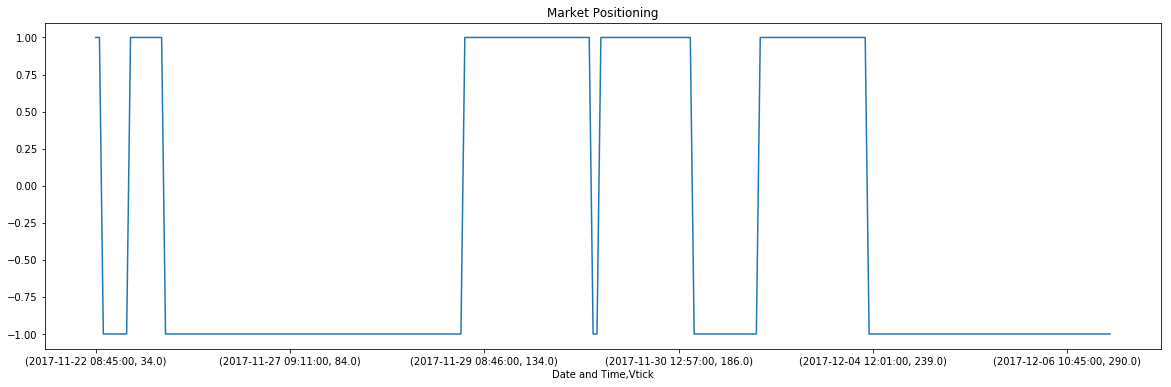

In [46]:
V_Wap['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(20,6))
plt.plot()


In [47]:
V_Wap['returns'] = np.log(V_Wap['close'] / V_Wap['close'].shift(1))

[]

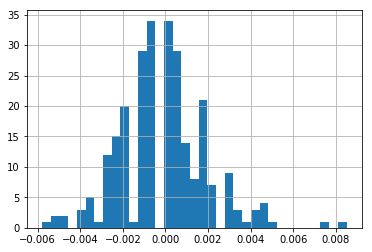

In [48]:
V_Wap['returns'].hist(bins=35)
plt.plot()

In [49]:
V_Wap['strategy'] = V_Wap['position'].shift(1) * V_Wap['returns']

In [50]:
V_Wap[['returns', 'strategy']].sum()

returns    -0.029507
strategy    0.021846
dtype: float64

[]

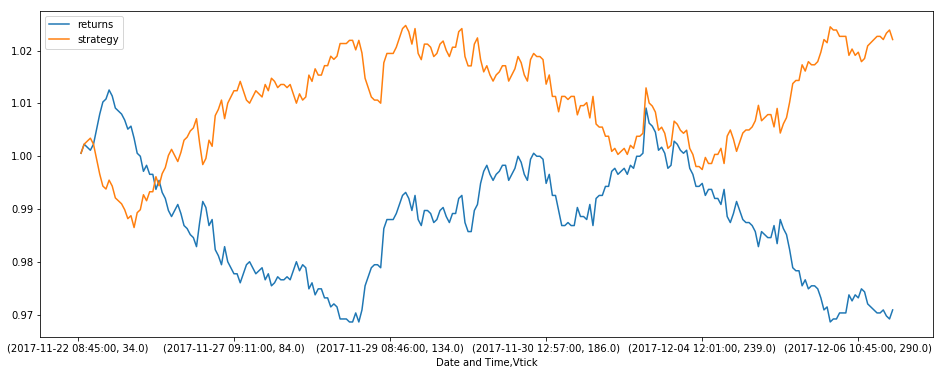

In [51]:
V_Wap[['returns', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(16, 6))
plt.plot()

In [52]:
 V_Wap['cumret'] = V_Wap['strategy'].cumsum().apply(np.exp)

In [53]:
V_Wap['cummax'] = V_Wap['cumret'].cummax()

[]

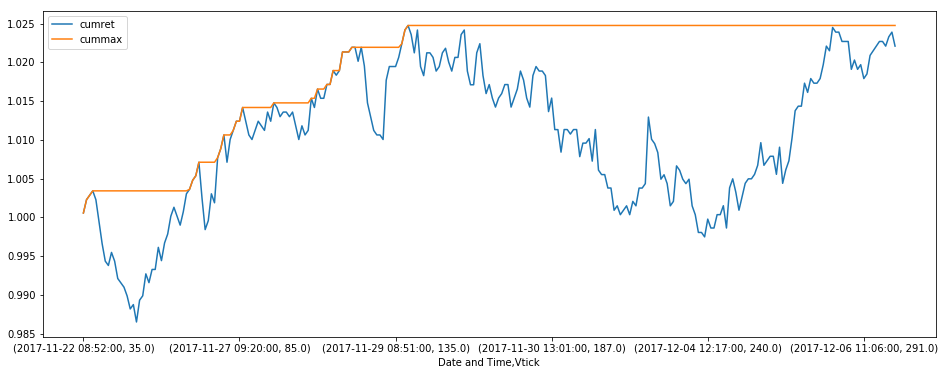

In [54]:
V_Wap[['cumret', 'cummax']].dropna().plot(figsize=(16, 6))
plt.plot()

In [55]:
drawdown = V_Wap['cummax'] - V_Wap['cumret']
drawdown.max() 

0.027263431783266179

In [56]:
V_Wap

Volume    high     low   close   dP1        vwap  \
Date and Time       Vtick                                                     
2017-11-22 08:45:00 34.0   1664.0  440.00  438.50  438.50 -1.25  439.000000   
2017-11-22 08:52:00 35.0   1221.0  439.25  438.50  438.75  0.25  438.750000   
2017-11-22 09:06:00 36.0   1583.0  439.75  438.50  439.50  0.75  438.916667   
2017-11-22 09:22:00 37.0   1479.0  440.00  438.75  439.25 -0.25  439.166667   
2017-11-22 09:40:00 38.0   1343.0  439.75  438.75  439.00 -0.25  439.083333   
2017-11-22 09:52:00 39.0   1560.0  439.75  439.00  439.50  0.50  439.250000   
2017-11-22 10:11:00 40.0   1259.0  441.00  439.25  440.75  1.25  439.833333   
2017-11-22 10:18:00 41.0   1612.0  442.00  440.50  442.00  1.25  441.000000   
2017-11-22 10:21:00 42.0   1314.0  443.25  441.75  443.00  1.00  442.250000   
2017-11-22 10:35:00 43.0   1804.0  443.25  442.00  443.25  0.25  442.416667   
2017-11-22 10:47:00 44.0   1300.0  444.25  443.25  444.00  0.75  443.583333   
2017-11-22 10:57:00 45.0   1308.0  444.50  443.50  443.50 -0.50  443.833333   
2017-11-22 11:14:00 46.0   1342.0  443.75  442.00  442.50 -1.00  442.583333   
2017-11-22 11:36:00 47.0   1507.0  443.00  441.50  442.25 -0.25  442.000000   
2017-11-22 12:23:00 48.0   1378.0  442.50  441.50  442.00  0.25  441.833333   
2017-11-22 13:10:00 49.0   1270.0  443.00  441.25  441.50 -1.25  441.833333   
2017-11-22 13:16:00 50.0   1634.0  441.50  440.25  440.75 -0.75  440.666667   
2017-11-22 13:20:00 51.0    544.0  441.25  440.50  441.00  0.25  440.750000   
2017-11-24 08:36:00 52.0   1343.0  440.25  437.75  440.00  2.00  438.583333   
2017-11-24 08:46:00 53.0   1420.0  440.50  438.50  438.75 -1.25  439.166667   
2017-11-24 08:55:00 54.0   1476.0  438.75  438.00  438.50 -0.25  438.250000   
2017-11-24 09:06:00 55.0   1514.0  438.75  437.25  437.25 -1.25  437.750000   
2017-11-24 09:24:00 56.0   1338.0  438.00  437.00  437.75  0.50  437.333333   
2017-11-24 09:44:00 57.0   1441.0  438.50  437.00  437.00 -0.75  437.500000   
2017-11-24 10:07:00 58.0   1407.0  437.50  437.00  437.00  0.00  437.166667   
2017-11-24 10:11:00 59.0   1870.0  437.25  435.75  435.75 -1.25  436.250000   
2017-11-24 10:16:00 60.0   1250.0  436.50  435.75  436.50  0.75  436.000000   
2017-11-24 10:26:00 61.0   1516.0  436.50  435.00  435.50 -1.00  435.500000   
2017-11-24 10:30:00 62.0   1331.0  435.50  435.00  435.00 -0.50  435.166667   
2017-11-24 10:34:00 63.0   1535.0  435.25  434.00  434.00 -1.00  434.416667   
2017-11-24 10:35:00 64.0   1338.0  434.00  433.50  433.50 -0.50  433.666667   
2017-11-24 10:40:00 65.0   1324.0  434.00  433.25  434.00  0.50  433.500000   
2017-11-24 10:47:00 66.0   1693.0  434.75  433.50  434.50  0.50  433.916667   
2017-11-24 11:04:00 67.0   1166.0  435.00  433.50  433.75 -0.75  434.000000   
2017-11-24 11:14:00 68.0   1534.0  434.00  432.50  432.75 -1.00  433.000000   
2017-11-24 11:17:00 69.0   1395.0  432.75  432.00  432.50 -0.25  432.250000   
2017-11-24 11:22:00 70.0   1699.0  432.50  431.75  432.00 -0.50  432.000000   
2017-11-24 11:28:00 71.0   1224.0  432.50  431.50  431.75 -0.25  431.833333   
2017-11-24 11:36:00 72.0   1384.0  431.75  431.00  431.00 -0.75  431.250000   
2017-11-24 11:49:00 73.0   1561.0  433.00  431.00  433.00  2.00  431.666667   
2017-11-24 11:56:00 74.0   1487.0  435.00  433.00  434.75  1.75  433.666667   
2017-11-24 12:00:00 75.0   1558.0  435.25  434.25  434.25 -0.50  434.583333   
2017-11-24 12:04:00 76.0   1214.0  434.50  432.25  432.75 -1.50  433.000000   
2017-11-24 12:05:00 77.0     83.0  433.25  432.75  433.25  0.50  432.916667   
2017-11-27 08:34:00 78.0   1335.0  431.25  430.00  430.75  0.25  430.416667   
2017-11-27 08:38:00 79.0   1234.0  431.25  430.25  430.25 -0.50  430.583333   
2017-11-27 08:41:00 80.0   1553.0  430.50  429.25  429.50 -0.75  429.666667   
2017-11-27 08:49:00 81.0   1407.0  431.25  429.25  431.00  1.50  429.916667   
2017-11-27 08:55:00 82.0   1325.0  431.25  429.50  429.75 -1.25  430.083333  